## Data Visualization

> This notebook Contains Data visualtion plots like word cloud, Map, Histogram for pre-processed data.
> Finally the summary of our findings.

### imports

In [36]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline  

### Read the file to DF

In [2]:
dat = pd.read_csv('dat.csv', sep='|', index_col=False, 
                 names=['id', 'title', 'desc', 'posteddate','latitude','longitude','accuracy'])

In [3]:
dat.head(5)

,id,title,desc,posteddate,latitude,longitude,accuracy
0,5539910199,vintage piece with shelfs drawers mirror solid...,real wood armoire like piece with shelfs and ...,2016-04-15 00:27:48,42.008330,-87.831463,10.0
1,5555358493,2 inseparable kittens in good hands,2 inseparable kittens in good hands tabby ca...,2016-04-25 01:04:42,42.134000,-87.934100,22.0
2,5555305619,full size mattress and boxspring,free full size mattress and boxspring good co...,2016-04-24 23:23:05,NaN,NaN,NaN
3,5555289633,three piece sectional,three piece sectional that spent the winter o...,2016-04-24 22:59:12,42.170737,-87.964367,22.0
4,5555287453,wooden armoire armchair,this beautiful wooden armoire and colorful ar...,2016-04-24 22:56:08,42.115670,-87.835693,22.0


### Change coloumns to required format

In [4]:
dat['posteddate'] = pd.to_datetime(dat['posteddate'])
dat.title = dat.title.astype(str)
dat.desc = dat.desc.astype(str)

In [5]:
dat.dtypes

id                     int64
title                 object
desc                  object
posteddate    datetime64[ns]
latitude             float64
longitude            float64
accuracy             float64
dtype: object

### Which Word is used most in title?

In [16]:
lst_title = dat['title'].tolist()

In [26]:
count_words = Counter()
for title in lst_title:
    count_words += Counter(title.split())

In [34]:
# remove stop words from counter
print 'contains %d words before deleting'%(len(count_words))
for k in count_words.keys():
    if k in stopwords.words("english"):
        del count_words[k]
print 'contains %d words after deleting'%(len(count_words))

contains 1293 words before deleting
contains 1245 words after deleting


In [59]:
count_words.most_common(10)

[('free', 500),
 ('tv', 74),
 ('couch', 73),
 ('wood', 50),
 ('scrap', 31),
 ('firewood', 27),
 ('sofa', 26),
 ('mattress', 25),
 ('2', 23),
 ('desk', 22)]

### What are the words mostly used in the posts?

In [42]:
lst_desc = dat['desc'].tolist()
len(lst_desc)

923

In [40]:
final_text_list = lst_title + lst_desc

In [51]:
with open('word.txt','w') as f:
    for t in final_text_list:
        for w in t.split():
            if w not in stopwords.words("english"):
                f.write(w+' ')
        f.write('\n')

In [52]:
with open('word.txt','r') as f:
    text = f.read()

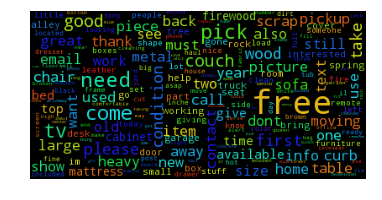

In [58]:
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### What are the places people are posting from ?

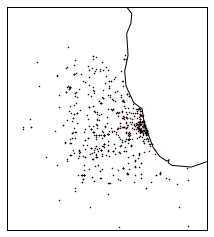

In [32]:
m = Basemap(llcrnrlon=-88.90063477,llcrnrlat=41.14556973,urcrnrlon=-87.07836914,urcrnrlat=42.84029065,
             resolution='i', projection='mill')
m.drawcoastlines() # draw coastlines
m.drawmapboundary() # draw a line around the map region
x,y = m(dat['longitude'].values, dat['latitude'].values)
m.plot(x, y, 'ro', markersize=1)
plt.show()

### Which day of the month we have high posts?

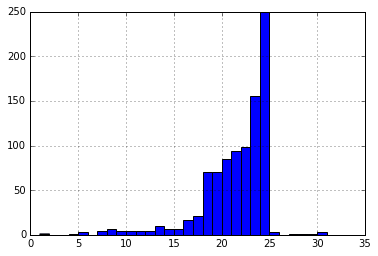

In [46]:
def get_date(_date):
    return _date.day

date = dat['posteddate'].map(get_date)
date.hist(bins=range(1,32))

### Which day of the week has high posts

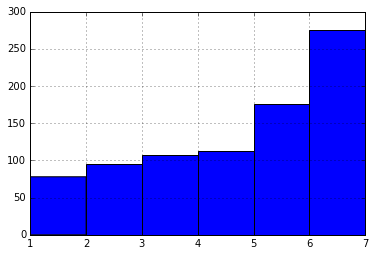

In [47]:
def get_day(_date):
    return _date.weekday()

day = dat['posteddate'].map(get_day)
day.hist(bins=range(1,8))

### Which time of the day has high posts?

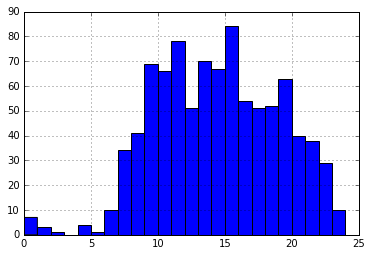

In [43]:
def get_hour(_date):
    return _date.hour

hour = dat['posteddate'].map(get_hour)
hour.hist(bins=range(0,25))

### My findings

* People give couch, tv as free more often
* People who live in chicago posts more often than suburbs
* 24 day of month has more Posts
* More posts between 20-24 days
* Posts increases from day 1 to day 7
* On a particular day users posts more post between 10 AM to 8 PM